<a href="https://colab.research.google.com/github/bryonie/Spatio_HW/blob/master/Bryonie_Spatio_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup Google Drive for pulling in files


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"18DPGKwPOdUQMn2xsyZLI1B1VNGA0ALG1"})   
downloaded.GetContentFile('2046729_spatial.csv')
downloaded = drive.CreateFile({'id':"1WoYkI7EjCB-4b9_HmufNwyNbhjx_n7CO"})   
downloaded.GetContentFile('2046729_traj.csv') 

Imports and reading files

In [7]:
import numpy as np
import pandas as pd
from matplotlib.dates import date2num, num2date
import datetime as datetime
import matplotlib .pyplot as plt
from mpl_toolkits import mplot3d
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
from statsmodels.tsa.ar_model import AR
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

spatial_file = '2046729_spatial.csv'

spatial_data = pd.read_csv(spatial_file)

spatial_data.head()

,Unnamed: 0,Unnamed: 0.1,name,capital,population,latitude,longitude,Virus X
0,0,0,Sierra,Downieville,3380,36.985898,-119.232078,5
1,1,1,Sacramento,Sacramento,1424415,38.573659,-121.487147,506
2,2,2,Santa Barbara,Santa Barbara,428655,34.423403,-119.704416,652
3,3,3,Calaveras,San Andreas,46127,38.231085,-120.619990,1
4,4,4,Ventura,Ventura,831587,34.265900,-119.258366,28


Normalizing Data (with comments)

In [3]:
normalized_dict = {
    "": ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
    "Unnamed: 0": [],
    "Unnamed: 0.1": [],
    "population": [],
    "latitude": [],
    "longitude": [],
    "Virus X": []
}

keys = list(normalized_dict.keys())
print(keys)

for key in keys:
  if(key != ''):
    normalized_dict[key].append(spatial_data[key].count())
    normalized_dict[key].append(spatial_data[key].mean())
    normalized_dict[key].append(spatial_data[key].std())
    normalized_dict[key].append(spatial_data[key].min())
    normalized_dict[key].append('25')
    normalized_dict[key].append('50')
    normalized_dict[key].append('75')
    normalized_dict[key].append(spatial_data[key].max())

# normalized_data = pd.DataFrame(normalized_dict)

normalized_data = spatial_data.describe()

normalized_data


['', 'Unnamed: 0', 'Unnamed: 0.1', 'population', 'latitude', 'longitude', 'Virus X']


,Unnamed: 0,Unnamed: 0.1,population,latitude,longitude,Virus X
count,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000
mean,28.500000,28.500000,6.072262e+05,37.612156,-120.734224,406.224138
std,16.886879,16.886879,1.446943e+06,2.258869,1.886696,1391.077457
min,0.000000,0.000000,1.222000e+03,32.718834,-123.965971,1.000000
25%,14.250000,14.250000,4.879500e+04,36.530736,-122.102211,5.250000
50%,28.500000,28.500000,1.809790e+05,37.814835,-120.905185,29.500000
75%,42.750000,42.750000,5.155448e+05,39.150608,-119.781361,171.750000
max,57.000000,57.000000,1.036385e+07,41.774326,-115.569962,9479.000000


Plot time!

Question 2.1

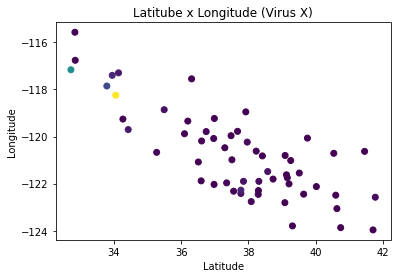

In [4]:
# Question 2.1
plt.scatter(
    spatial_data["latitude"],
    spatial_data["longitude"],
    c=spatial_data["Virus X"]
)
plt.title('Latitube x Longitude (Virus X)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Question 2.2

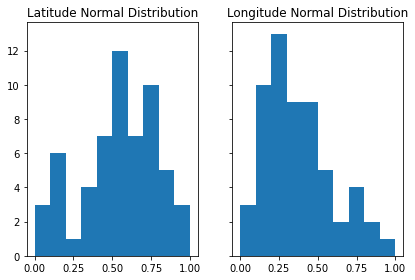

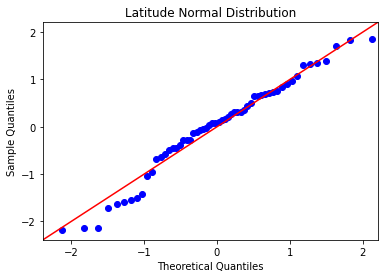

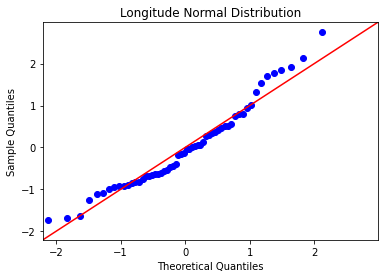

In [37]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

latitude = normalize(spatial_data["latitude"])
longitude = normalize(spatial_data["longitude"])

# fig.suptitle("Latitude vs Longitude")
axs[0].set_title("Latitude Normal Distribution")
axs[0].hist(latitude, label="Latitude")
axs[1].set_title("Longitude Normal Distribution")
axs[1].hist(longitude, label="Longitude")


sm.qqplot(latitude,fit=True,line='45')
plt.title("Latitude Normal Distribution")
sm.qqplot(longitude,fit=True,line='45')
plt.title("Longitude Normal Distribution")
plt.show()



Question 2.3

Int64Index([], dtype='int64')

Question 2.4

Question 2.5

Question 2.6

Question 2.7

Question 2.8